<a href="https://colab.research.google.com/github/harshari/PlantAI/blob/main/Chord_Prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.9939 - accuracy: 0.1429
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 1.9452 - accuracy: 0.1429
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 1.8976 - accuracy: 0.2857
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 1.8510 - accuracy: 0.2857
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 1.8055 - accuracy: 0.2857
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 1.7610 - accuracy: 0.2857
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 1.7176 - accuracy: 0.4286
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 1.6752 - accuracy: 0.4286
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 1.6338 - accuracy: 0.4286
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 1.5934 - accuracy: 0.5714
Epoch 11/200
1/1 [=====

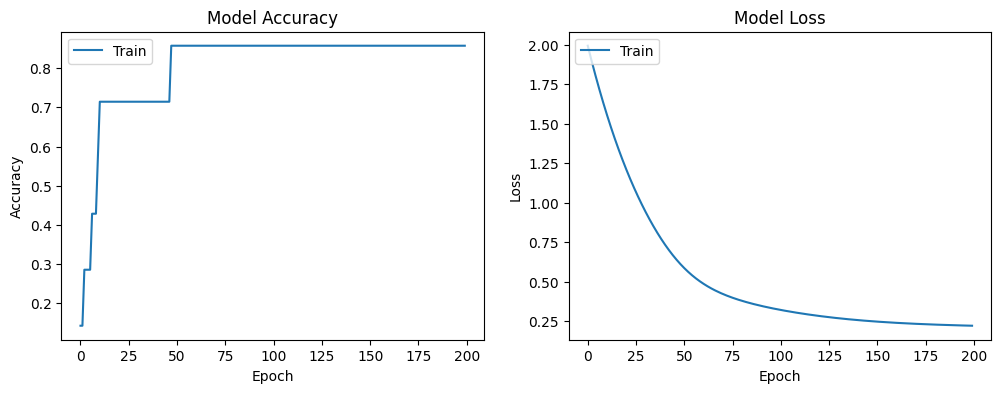

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

# One-hot encodings for chords
num_chords = 7
chord_to_one_hot = {
    "C": [1, 0, 0, 0, 0, 0, 0],
    "G": [0, 1, 0, 0, 0, 0, 0],
    "Am": [0, 0, 1, 0, 0, 0, 0],
    "F": [0, 0, 0, 1, 0, 0, 0],
    "Dm": [0, 0, 0, 0, 1, 0, 0],
    "Em": [0, 0, 0, 0, 0, 1, 0],
    "Bm": [0, 0, 0, 0, 0, 0, 1]
}

# Preprocessing functions
def preprocess_input_features(progression, chord_to_one_hot):
    sequences = []
    for chord, duration in progression:
        chord_vector = chord_to_one_hot[chord] + [duration]
        sequences.append(chord_vector)
    return np.array(sequences)

def preprocess_target_labels(progression, chord_to_one_hot):
    sequences = []
    for chord, _ in progression:
        chord_vector = chord_to_one_hot[chord]
        sequences.append(chord_vector)
    return np.array(sequences)

# Example harmonious progression with durations
harmonious_progression = [
    ("C", 1), ("G", 0.5), ("Am", 1), ("F", 0.5),
    ("C", 1), ("Dm", 0.5), ("G", 1), ("C", 0.5)
]

# Preprocess the training data
sequences = preprocess_input_features(harmonious_progression[:-1], chord_to_one_hot)
next_chords = preprocess_target_labels(harmonious_progression[1:], chord_to_one_hot)

# Model parameters
num_features = 8  # 7 for one-hot encoded chord, 1 for duration

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(1, num_features), return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(num_chords, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data for training
sequences = sequences.reshape((sequences.shape[0], 1, num_features))

# Train the model
history = model.fit(sequences, next_chords, epochs=200, batch_size=64)


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Function to preprocess the input for prediction
def preprocess_input_for_prediction(last_chord, chord_to_one_hot):
    chord_vector = chord_to_one_hot[last_chord[0]] + [last_chord[1]]  # Include duration
    return np.array([chord_vector])

# Function to generate a chord sequence
def generate_chord_sequence(model, start_progression, chord_to_one_hot, num_predictions=100):
    current_progression = start_progression[:]
    for _ in range(num_predictions):
        last_chord = current_progression[-1]
        processed_progression = preprocess_input_for_prediction(last_chord, chord_to_one_hot)
        processed_progression = processed_progression.reshape((1, 1, -1))
        predicted_chords = model.predict(processed_progression)

        # Ensuring that the dimensions are correct
        if predicted_chords.ndim == 2 and predicted_chords.shape[1] == num_chords:
            next_chord_index = np.argmax(predicted_chords[0])
        else:
            raise ValueError("Unexpected output shape from the model.")

        next_chord = list(chord_to_one_hot.keys())[next_chord_index]
        next_duration = 1  # Set a default duration
        current_progression.append((next_chord, next_duration))

    return current_progression

# Example progression for prediction
example_progression = [("Am", 1), ("C", 0.5), ("Dm", 0.3), ("Am", 1.5), ("F", 1), ("Dm", 2), ("G", 1), ("C", 1), ("G", 1)]

# Generate the predicted sequence
predicted_sequence = generate_chord_sequence(model, example_progression, chord_to_one_hot, 100)
print(predicted_sequence)

print("In MIDI format")
# Format output with double quotes for MIDI
formatted_sequence = ', '.join([f'("{chord}", {duration})' for chord, duration in predicted_sequence])
print(f'[{formatted_sequence}]')



1/1 [==============================] - 0s 22ms/step
[('Am', 1), ('C', 0.5), ('Dm', 0.3), ('Am', 1.5), ('F', 1), ('Dm', 2), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1), ('G', 1), ('C', 1

## Now trying to add regularization to avoid overfitting as the model is repeating C, G, C, G again
Looks like an overfitting example: [("Am", 1), ("C", 0.5), ("Dm", 0.3), ("Am", 1.5), ("F", 1), ("Dm", 2), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1), ("C", 1), ("G", 1)]



Epoch 1/700
1/1 [==============================] - 4s 4s/step - loss: 1.9190 - accuracy: 0.4000 - val_loss: 1.8635 - val_accuracy: 0.0000e+00
Epoch 2/700
1/1 [==============================] - 0s 47ms/step - loss: 1.9739 - accuracy: 0.2000 - val_loss: 1.8547 - val_accuracy: 0.0000e+00
Epoch 3/700
1/1 [==============================] - 1s 584ms/step - loss: 1.9689 - accuracy: 0.0000e+00 - val_loss: 1.8469 - val_accuracy: 0.0000e+00
Epoch 4/700
1/1 [==============================] - 0s 61ms/step - loss: 1.8158 - accuracy: 0.2000 - val_loss: 1.8406 - val_accuracy: 0.0000e+00
Epoch 5/700
1/1 [==============================] - 0s 69ms/step - loss: 1.9702 - accuracy: 0.4000 - val_loss: 1.8362 - val_accuracy: 0.0000e+00
Epoch 6/700
1/1 [==============================] - 0s 59ms/step - loss: 1.8357 - accuracy: 0.2000 - val_loss: 1.8328 - val_accuracy: 0.0000e+00
Epoch 7/700
1/1 [==============================] - 0s 51ms/step - loss: 1.6591 - accuracy: 0.4000 - val_loss: 1.8291 - val_accuracy: 

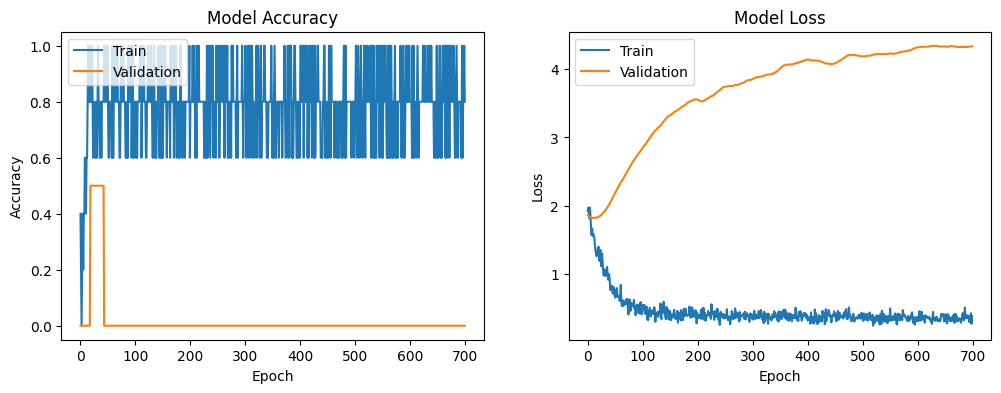

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt


# One-hot encodings for chords
num_chords = 7
chord_to_one_hot = {
    "C": [1, 0, 0, 0, 0, 0, 0],
    "G": [0, 1, 0, 0, 0, 0, 0],
    "Am": [0, 0, 1, 0, 0, 0, 0],
    "F": [0, 0, 0, 1, 0, 0, 0],
    "Dm": [0, 0, 0, 0, 1, 0, 0],
    "Em": [0, 0, 0, 0, 0, 1, 0],
    "Bb": [0, 0, 0, 0, 0, 0, 1]
}

# Preprocessing functions (as defined earlier)
# Preprocessing functions
def preprocess_input_features(progression, chord_to_one_hot):
    sequences = []
    for chord, duration in progression:
        chord_vector = chord_to_one_hot[chord] + [duration]
        sequences.append(chord_vector)
    return np.array(sequences)

def preprocess_target_labels(progression, chord_to_one_hot):
    sequences = []
    for chord, _ in progression:
        chord_vector = chord_to_one_hot[chord]
        sequences.append(chord_vector)
    return np.array(sequences)


# Example harmonious progression with durations
harmonious_progression = [
    ("C", 1), ("G", 0.5), ("Am", 1), ("F", 0.5),
    ("C", 1), ("Dm", 0.5), ("G", 1), ("C", 0.5)
]

# Preprocess the training data
sequences = preprocess_input_features(harmonious_progression[:-1], chord_to_one_hot)
next_chords = preprocess_target_labels(harmonious_progression[1:], chord_to_one_hot)


# Model parameters
num_features = 8  # 7 for one-hot encoded chord, 1 for duration

# Define the RNN model with regularization
model_with_regularisation = Sequential()
model_with_regularisation.add(SimpleRNN(64, input_shape=(1, num_features), return_sequences=True, kernel_regularizer=l2(0.001)))
model_with_regularisation.add(Dropout(0.2))  # Dropout layer for regularization
model_with_regularisation.add(SimpleRNN(64, kernel_regularizer=l2(0.001)))
model_with_regularisation.add(Dropout(0.2))  # Another dropout layer for regularization
model_with_regularisation.add(Dense(num_chords, activation='softmax'))

model_with_regularisation.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data for training
sequences = sequences.reshape((sequences.shape[0], 1, num_features))

# Train the model with a validation split
history = model_with_regularisation.fit(sequences, next_chords, epochs=700, batch_size=64, validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Now we will try running the same input and see the difference

In [ ]:
# Function to preprocess the input for prediction
def preprocess_input_for_prediction(last_chord, chord_to_one_hot):
    chord_vector = chord_to_one_hot[last_chord[0]] + [last_chord[1]]  # Include duration
    return np.array([chord_vector])

# Function to generate a chord sequence with the regularized model
def generate_chord_sequence(model_with_regularisation, start_progression, chord_to_one_hot, num_predictions=100):
    current_progression = start_progression[:]
    for _ in range(num_predictions):
        last_chord = current_progression[-1]
        processed_progression = preprocess_input_for_prediction(last_chord, chord_to_one_hot)
        processed_progression = processed_progression.reshape((1, 1, -1))
        predicted_chords = model_with_regularisation.predict(processed_progression)

        # Ensuring that the dimensions are correct
        if predicted_chords.ndim == 2 and predicted_chords.shape[1] == num_chords:
            next_chord_index = np.argmax(predicted_chords[0])
        else:
            raise ValueError("Unexpected output shape from the model.")

        next_chord = list(chord_to_one_hot.keys())[next_chord_index]
        next_duration = 1  # Set a default duration
        current_progression.append((next_chord, next_duration))

    return current_progression

# Example progression for prediction
example_progression = [("Am", 1), ("C", 0.5), ("Dm", 0.3), ("Am", 1.5), ("F", 1), ("Dm", 2), ("G", 1), ("C", 1), ("G", 1)]

# Generate the predicted sequence using the regularized model
predicted_sequence = generate_chord_sequence(model_with_regularisation, example_progression, chord_to_one_hot, 100)
print(predicted_sequence)

# Format output with double quotes for MIDI
formatted_sequence = ', '.join([f'("{chord}", {duration})' for chord, duration in predicted_sequence])
print(f'[{formatted_sequence}]')


1/1 [==============================] - 0s 23ms/step
[('Am', 1), ('C', 0.5), ('Dm', 0.3), ('Am', 1.5), ('F', 1), ('Dm', 2), ('G', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 1), ('G', 1), ('Am', 1), ('F', 1), ('C', 

# Now, we should try a Transformer model. The transformer model should learns better dependency. However, it hevily depends on the usage and dataset. We can improve the input that we give to the model:

Epoch 1/700
1/1 [==============================] - 2s 2s/step - loss: 2.7063 - accuracy: 0.2000 - val_loss: 2.3851 - val_accuracy: 0.0000e+00
Epoch 2/700
1/1 [==============================] - 0s 65ms/step - loss: 2.8905 - accuracy: 0.2000 - val_loss: 2.3834 - val_accuracy: 0.0000e+00
Epoch 3/700
1/1 [==============================] - 0s 58ms/step - loss: 2.9593 - accuracy: 0.2000 - val_loss: 2.3827 - val_accuracy: 0.0000e+00
Epoch 4/700
1/1 [==============================] - 0s 47ms/step - loss: 2.7382 - accuracy: 0.2000 - val_loss: 2.3832 - val_accuracy: 0.0000e+00
Epoch 5/700
1/1 [==============================] - 0s 50ms/step - loss: 2.8196 - accuracy: 0.2000 - val_loss: 2.3854 - val_accuracy: 0.0000e+00
Epoch 6/700
1/1 [==============================] - 0s 44ms/step - loss: 2.6026 - accuracy: 0.0000e+00 - val_loss: 2.3870 - val_accuracy: 0.0000e+00
Epoch 7/700
1/1 [==============================] - 0s 41ms/step - loss: 2.8181 - accuracy: 0.2000 - val_loss: 2.3880 - val_accuracy: 0

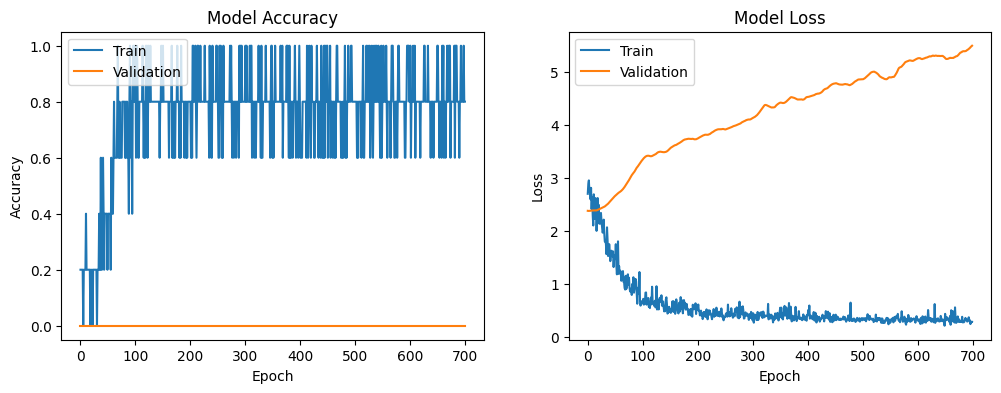

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
import numpy as np
import matplotlib.pyplot as plt


# One-hot encodings for chords
num_chords = 7
chord_to_one_hot = {
    "C": [1, 0, 0, 0, 0, 0, 0],
    "G": [0, 1, 0, 0, 0, 0, 0],
    "Am": [0, 0, 1, 0, 0, 0, 0],
    "F": [0, 0, 0, 1, 0, 0, 0],
    "Dm": [0, 0, 0, 0, 1, 0, 0],
    "Em": [0, 0, 0, 0, 0, 1, 0],
    "Bm": [0, 0, 0, 0, 0, 0, 1]
}

# Preprocessing functions
def preprocess_input_features(progression, chord_to_one_hot):
    sequences = []
    for chord, duration in progression:
        chord_vector = chord_to_one_hot[chord] + [duration]
        sequences.append(chord_vector)
    return np.array(sequences)

def preprocess_target_labels(progression, chord_to_one_hot):
    sequences = []
    for chord, _ in progression:
        chord_vector = chord_to_one_hot[chord]
        sequences.append(chord_vector)
    return np.array(sequences)

# Example harmonious progression with durations
harmonious_progression = [
    ("C", 1), ("G", 0.5), ("Am", 1), ("F", 0.5),
    ("C", 1), ("Dm", 0.5), ("G", 1), ("C", 0.5)
]

# Preprocess the training data
sequences = preprocess_input_features(harmonious_progression[:-1], chord_to_one_hot)
next_chords = preprocess_target_labels(harmonious_progression[1:], chord_to_one_hot)

# Reshape the sequences to match the input shape expected by the Transformer model
sequences = sequences.reshape((sequences.shape[0], 1, num_features))

######
######
# Transformer model parameters
num_features = 8  # Update this based on your combined one-hot encoding length and duration
num_chords = 7    # Update this based on your number of unique chords
num_heads = 2
ff_dim = 32  # Hidden layer size in feed forward network

def build_transformer_model(num_features, num_chords, num_heads=2, ff_dim=32):
    inputs = Input(shape=(1, num_features))

    # Transformer Block
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(attention + inputs)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    outputs = Dense(num_chords, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build the Transformer model
transformer_model = build_transformer_model(num_features, num_chords, num_heads, ff_dim)
transformer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have already preprocessed your data into `sequences` and `next_chords`
# Ensure that `sequences` are reshaped as required: (number of samples, 1, num_features)
history = transformer_model.fit(sequences, next_chords, epochs=700, batch_size=64, validation_split=0.2)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()





In [ ]:
# Function to preprocess the input for prediction
def preprocess_input_for_prediction(last_chord, chord_to_one_hot):
    chord_vector = chord_to_one_hot[last_chord[0]] + [last_chord[1]]  # Include duration
    return np.array([chord_vector])

# Function to generate a chord sequence with the Transformer model
def generate_chord_sequence(transformer_model, start_progression, chord_to_one_hot, num_predictions=100):
    current_progression = start_progression[:]
    for _ in range(num_predictions):
        last_chord = current_progression[-1]
        processed_progression = preprocess_input_for_prediction(last_chord, chord_to_one_hot)
        processed_progression = processed_progression.reshape((1, 1, -1))
        predicted_chords = transformer_model.predict(processed_progression)

        if predicted_chords.ndim == 2 and predicted_chords.shape[1] == num_chords:
            next_chord_index = np.argmax(predicted_chords[0])
        else:
            raise ValueError("Unexpected output shape from the model.")

        next_chord = list(chord_to_one_hot.keys())[next_chord_index]
        next_duration = 1  # Consider varying this value for more realistic sequences
        current_progression.append((next_chord, next_duration))

    return current_progression

# Example progression for prediction
example_progression = [("Am", 1), ("C", 0.5), ("Dm", 0.3), ("Am", 1.5), ("F", 1), ("Dm", 2), ("G", 1), ("C", 1), ("G", 1)]

# Generate the predicted sequence using the Transformer model
predicted_sequence = generate_chord_sequence(transformer_model, example_progression, chord_to_one_hot, 100)
print(predicted_sequence)

# Format output with double quotes for MIDI
formatted_sequence = ', '.join([f'("{chord}", {duration})' for chord, duration in predicted_sequence])
print(f'[{formatted_sequence}]')


### Read MIDI input here:

In [ ]:
import mido
from mido import Message, MidiFile, MidiTrack, MetaMessage
import time

# Augmented chords dictionary
chords = {
    "A": [57, 61, 64],    # A, C#, E
    "C#m": [61, 64, 68],  # C#, E, G#
    "F#m": [66, 69, 73],  # F#, A, C#
    "D": [62, 66, 69],    # D, F#, A
    "E7": [64, 68, 71],   # E, G#, B, D (E7 without D for simplicity)
}

# Chord progression in the specified format
example_progression = [("A", 1), ("C#m", 1), ("F#m", 1), ("A", 1), ("D", 1), ("E7", 2)]

# Function to create MIDI messages for chords
def create_chord_messages(chord, duration):
    chord_notes = chords[chord]
    for note in chord_notes:
        yield Message('note_on', note=note, velocity=64)
    time.sleep(duration)
    for note in chord_notes:
        yield Message('note_off', note=note, velocity=64)

# Main function to create MIDI file
def create_midi_file():
    mid = MidiFile()
    track = MidiTrack()
    mid.tracks.append(track)

    # Add chord messages
    for chord, duration in example_progression:
        for msg in create_chord_messages(chord, duration):
            track.append(msg)

if __name__ == '__main__':
    create_midi_file()


In [ ]:
import mido
from mido import Message, MidiFile, MidiTrack, MetaMessage
import time

# Augmented chords dictionary
chords = {
    "A": [57, 61, 64],    # A, C#, E
    "C#m": [61, 64, 68],  # C#, E, G#
    "F#m": [66, 69, 73],  # F#, A, C#
    "D": [62, 66, 69],    # D, F#, A
    "E7": [64, 68, 71],   # E, G#, B, D (E7 without D for simplicity)
}

# Chord progression in the specified format
example_progression = [("A", 1), ("C#m", 1), ("F#m", 1), ("A", 1), ("D", 1), ("E7", 2)]

# Function to create MIDI messages for chords
def create_chord_messages(chord, duration):
    chord_notes = chords[chord]
    for note in chord_notes:
        yield Message('note_on', note=note, velocity=64)
    time.sleep(duration)
    for note in chord_notes:
        yield Message('note_off', note=note, velocity=64)

# Main function to create MIDI file
def create_midi_file():
    mid = MidiFile()
    track = MidiTrack()
    mid.tracks.append(track)

    # Add chord messages
    for chord, duration in example_progression:
        for msg in create_chord_messages(chord, duration):
            track.append(msg)

    # Save MIDI file
    midi_file_name = "la_la_land_another_day_of_sun.mid"
    mid.save(midi_file_name)
    print("MIDI file saved as:", midi_file_name)

    # Save chord progression in text file
    txt_file_name = "chord_progression.txt"
    with open(txt_file_name, "w") as txt_file:
        for chord, duration in example_progression:
            txt_file.write(f"{chord}: {duration}\n")
    print("Chord progression saved as:", txt_file_name)

if __name__ == '__main__':
    create_midi_file()


MIDI file saved as: la_la_land_another_day_of_sun.mid
Chord progression saved as: chord_progression.txt
